In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("C:/Users/pedro.martins/OneDrive - Kestraa/25 do 12/Python Scripts/Machine Learning/Dados/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df = df.drop(columns=["id"])

In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Verificando os dados faltantes

In [5]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [6]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [7]:
drop = df[df["gender"] == "Other"].index
df.drop(drop, inplace = True)
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [9]:
df.bmi

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5109, dtype: float64

In [10]:
df.avg_glucose_level

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5109, dtype: float64

In [11]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Substituindo os dados faltantes de bmi pela média

In [12]:
df = df.fillna(df.mean())

C:\Users\PEDRO~1.MAR\AppData\Local\Temp/ipykernel_7588/114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [13]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Visualização

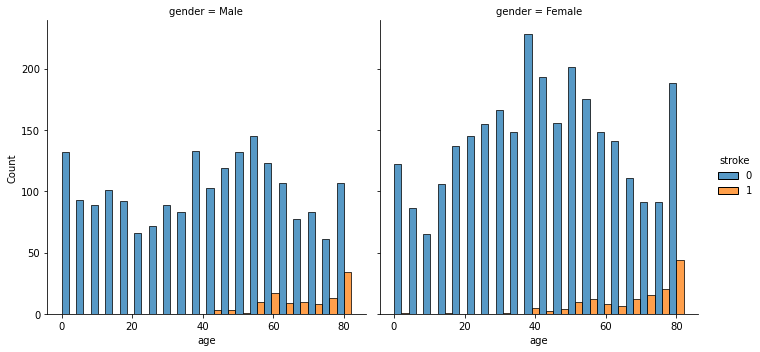

In [14]:
sns.displot(df, x="age",col="gender", hue="stroke",  multiple="dodge")

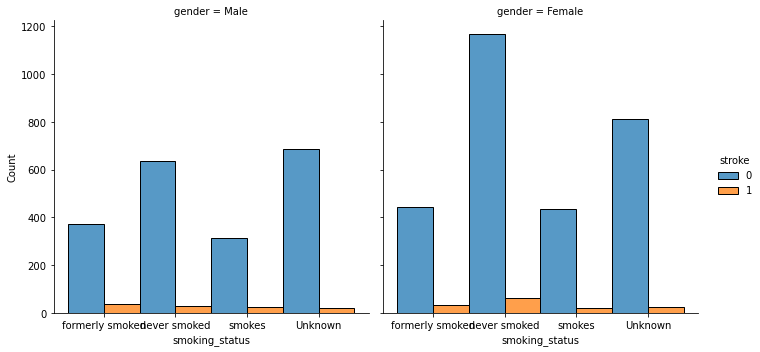

In [15]:
sns.displot(df, x="smoking_status", hue="stroke", col="gender", multiple="dodge")


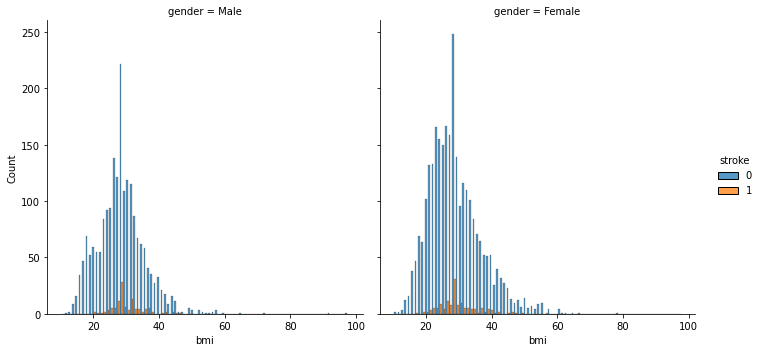

In [16]:
sns.displot(df, x="bmi", hue="stroke", col="gender", multiple="dodge")

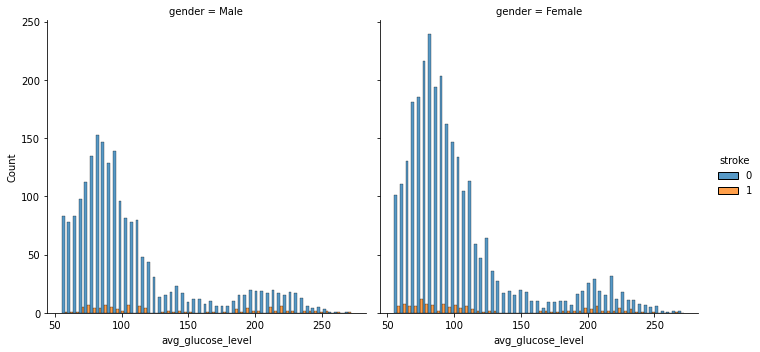

In [17]:
sns.displot(df, x="avg_glucose_level", hue="stroke", col="gender", multiple="dodge")

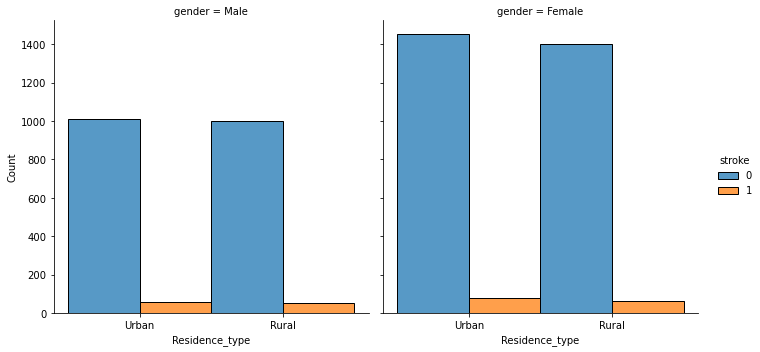

In [18]:
sns.displot(df, x="Residence_type", hue="stroke", col="gender", multiple="dodge")

* id = deleta
* age = classificar a categoria com intervalos de 20 anos
* avg_glucose_level = classificar a categoria pelo box plot
* bmi = classificar a categoria pelo box plot
* work_type = one hot encouding
* smoking_status = one hot encouding
* ever_married = binario            
* Residence_type = binario

In [19]:
def classificadorIdade(x):
    if x < 20:
        return 1 #"< 20"
    
    if x < 40:
        return 2 #"de 20 a 39"
    
    if x < 60:
        return 3 #"de 40 a 59"
    
    if x < 80:
        return 4 #"de 60 a 79"
    
    if x <= 100:
        return 5 #"de 80 a 100"

In [20]:
df['age'] = df['age'].apply(lambda x: classificadorIdade(x))

In [21]:
df.age.unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [22]:
df.bmi.describe()

count    5109.000000
mean       28.894560
std         7.698235
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [23]:
df.avg_glucose_level.describe()

count    5109.000000
mean      106.140399
std        45.285004
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [24]:
def classificadorAVG(x):
    if x <= 77.245:
        return '<= 25%'
    
    if x <= 91.885:
        return 'entre 26% a 50%'
    
    if x <= 114.09:
        return 'entre 50% a 75%'
    
    else: return '>= 76%'
    
    
def classificadorBMI(x):
    if x <= 23.8:
        return '<= 25%'
    
    if x <= 28.4:
        return 'entre 26% a 50%'
    
    if x <= 32.8:
        return 'entre 50% a 75%'
    
    else: return '>= 76%'

In [25]:
df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x: classificadorAVG(x))
df['bmi'] = df['bmi'].apply(lambda x: classificadorBMI(x))

In [26]:
print(f'BMI:\n{df.bmi.unique()} \n\navg_glucose_level:\n{df.avg_glucose_level.unique()}')

BMI:
['>= 76%' 'entre 50% a 75%' 'entre 26% a 50%' '<= 25%'] 

avg_glucose_level:
['>= 76%' 'entre 50% a 75%' '<= 25%' 'entre 26% a 50%']


In [28]:
labelencoder = LabelEncoder()

df["gender"] = labelencoder.fit_transform(df["gender"])
df["ever_married"] = labelencoder.fit_transform(df["ever_married"])
df["Residence_type"] = labelencoder.fit_transform(df["Residence_type"])

In [29]:
df['avg_glucose_level'] = pd.Categorical(df['avg_glucose_level'])
dfavg = pd.get_dummies(df['avg_glucose_level'], prefix = 'avg_glucose_level_cod')
dfavg

,avg_glucose_level_cod_<= 25%,avg_glucose_level_cod_>= 76%,avg_glucose_level_cod_entre 26% a 50%,avg_glucose_level_cod_entre 50% a 75%
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
5105,0,0,1,0
5106,0,1,0,0
5107,0,0,1,0
5108,0,1,0,0


In [30]:
df['bmi'] = pd.Categorical(df['bmi'])
dfbmi = pd.get_dummies(df['bmi'], prefix = 'bmi_cod')
dfbmi

,bmi_cod_<= 25%,bmi_cod_>= 76%,bmi_cod_entre 26% a 50%,bmi_cod_entre 50% a 75%
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
5105,0,0,0,1
5106,0,1,0,0
5107,0,0,0,1
5108,0,0,1,0


In [31]:
df['work_type'] = pd.Categorical(df['work_type'])
dfwork = pd.get_dummies(df['smoking_status'], prefix = 'work_type_cod')
dfwork

,work_type_cod_Unknown,work_type_cod_formerly smoked,work_type_cod_never smoked,work_type_cod_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [32]:
df['smoking_status'] = pd.Categorical(df['smoking_status'])
dfsmoke = pd.get_dummies(df['smoking_status'], prefix = 'smoking_status_cod')
dfsmoke

,smoking_status_cod_Unknown,smoking_status_cod_formerly smoked,smoking_status_cod_never smoked,smoking_status_cod_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [33]:
df['age'] = pd.Categorical(df['age'])
dfage = pd.get_dummies(df['age'], prefix = 'age_cod')
dfage

,age_cod_1,age_cod_2,age_cod_3,age_cod_4,age_cod_5
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,0,0,1
5106,0,0,0,0,1
5107,0,1,0,0,0
5108,0,0,1,0,0


In [34]:
df.drop("bmi", axis=1, inplace=True)
df.drop("work_type", axis=1, inplace=True)
df.drop("smoking_status", axis=1, inplace=True)
df.drop("avg_glucose_level", axis=1, inplace=True)
df.drop("age", axis=1, inplace=True)

In [35]:
df = pd.concat([df, dfwork], axis=1)
df = pd.concat([df, dfavg], axis=1)
df = pd.concat([df, dfbmi], axis=1)
df = pd.concat([df, dfage], axis=1)
df = pd.concat([df, dfsmoke], axis=1)
df

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,work_type_cod_Unknown,work_type_cod_formerly smoked,work_type_cod_never smoked,work_type_cod_smokes,...,bmi_cod_entre 50% a 75%,age_cod_1,age_cod_2,age_cod_3,age_cod_4,age_cod_5,smoking_status_cod_Unknown,smoking_status_cod_formerly smoked,smoking_status_cod_never smoked,smoking_status_cod_smokes
0,1,0,1,1,1,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
2,1,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0,0,1,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,1,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
5106,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
5107,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
5108,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


# Modelo

In [36]:
previsores = df.drop(columns="stroke")
classe = df["stroke"]

In [37]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [38]:
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [39]:
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[1443,   14],
       [  75,    1]], dtype=int64)

In [40]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.9419439008480104

In [41]:
nb = GaussianNB()
nb.fit(X_treinamento, y_treinamento)

GaussianNB()

In [42]:
previsoes = nb.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[680, 777],
       [  4,  72]], dtype=int64)

In [43]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.49054142204827134

In [44]:
neighbors = KNeighborsClassifier(n_neighbors=3)
neighbors.fit(X_treinamento, y_treinamento)

KNeighborsClassifier(n_neighbors=3)

In [45]:
previsoes = neighbors.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[1445,   12],
       [  73,    3]], dtype=int64)

In [46]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.9445531637312459

In [47]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_treinamento, y_treinamento)

DecisionTreeClassifier(random_state=1)

In [48]:
previsoes = tree.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[1425,   32],
       [  72,    4]], dtype=int64)

In [49]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.9321591650358774